In [3]:
import pandas as pd
pd.set_option('display.max_columns', 23)
dados = pd.read_csv('D:\\ML\\Didatica Tech\\Datasets\\recipeData.csv', encoding='latin-1') # 
dados.drop('URL', axis = 1, inplace = True)

In [96]:
dados.head()

,BeerID,Name,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0


In [4]:
dados["Style"].value_counts()

American IPA                         11940
American Pale Ale                     7581
Saison                                2617
American Light Lager                  2277
American Amber Ale                    2038
Blonde Ale                            1753
Imperial IPA                          1478
American Stout                        1268
Irish Red Ale                         1204
American Brown Ale                    1152
Witbier                               1072
California Common Beer                1044
Weissbier                              988
Oatmeal Stout                          961
Russian Imperial Stout                 929
Weizen/Weissbier                       919
Sweet Stout                            919
Robust Porter                          897
Kölsch                                 869
Double IPA                             864
Cream Ale                              830
American Porter                        787
English IPA                            784
Imperial St

In [4]:
faltantes = dados.isnull().sum()
faltantes_percentual = (dados.isnull().sum() / len(dados['StyleID'])) * 100
print(faltantes_percentual)

BeerID            0.000000
Name              0.001354
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.839550
PrimingAmount    93.536508
UserId           68.358132
dtype: float64


In [5]:
dados["StyleID"].value_counts()

7      11940
10      7581
134     2617
9       2277
4       2038
       ...  
99         6
16         6
127        5
164        2
73         2
Name: StyleID, Length: 176, dtype: int64

In [5]:
# carrega apenas registros em que o valor da coluna StyleID seja igual à 7
# dados_1 = dados.loc[(dados['StyleID'] == 7)]
# dados_1.shape
# carrega apenas registros em que o valor da coluna StyleID seja igual aos IDs da lista
dados = dados.loc[(dados['StyleID'].isin([7, 10, 134, 9, 4,30, 86, 12,92, 6, 175, 39]))]
dados.shape

(35424, 22)

In [6]:
# removendo colunas com mais de 50% de registros com valor nulo
dados.drop('PrimingMethod', axis = 1, inplace = True)
dados.drop('PrimingAmount', axis = 1, inplace = True)
dados.drop('UserId', axis = 1, inplace = True)
dados.drop('BeerID', axis = 1, inplace = True)
dados.drop('Name', axis = 1, inplace = True)
dados.drop('Style', axis = 1, inplace = True)

In [102]:
dados.head()

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,NaN,Specific Gravity,All Grain,1.0,NaN
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,NaN,75.0,NaN,Specific Gravity,All Grain,NaN,NaN
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,NaN,Specific Gravity,All Grain,NaN,21.11


In [110]:
dados.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale         int64
PitchRate        float64
PrimaryTemp      float64
All Grain          uint8
BIAB               uint8
Partial Mash       uint8
extract            uint8
dtype: object

In [8]:
# transformar campos texto em campos numéricos. 
# se a coluna possuir apenas dois valores distintos, transformar em 0 e 1
# se houver mais do que dois valores, utilizar a técnica de encoding
dados['SugarScale'].value_counts()
#dados['BrewMethod'].value_counts()

Specific Gravity    34605
Plato                 819
Name: SugarScale, dtype: int64

In [7]:
# Transformando os dados em 0 e 1
#dados["SugarScale"].replace(to_replace=dict('Specific Gravity'=1, Plato=0), inplace=True)
dados["SugarScale"].replace('Specific Gravity', 1, inplace=True)
dados["SugarScale"].replace('Plato', 0, inplace=True)

In [8]:
dados['SugarScale'].value_counts()

1    34605
0      819
Name: SugarScale, dtype: int64

In [9]:
class_encode = pd.get_dummies(dados['BrewMethod'])  
# concatena as novas colunas do método encoding com o dataset
dados = pd.concat([dados, class_encode], axis=1)
dados.drop('BrewMethod', axis = 1, inplace = True)

In [10]:
# boxplot ajuda a enxergar a distribuição dos valores em relação à média.
# forma visual para identificar se a variável possui outliers
# se houver, necessário avaliar a necessidade de excluir os outliers 
import matplotlib.pyplot as plt
dados.boxplot(column=['BoilGravity', 'MashThickness', 'PitchRate', 'PrimaryTemp']) # 
plt.show()

<Figure size 640x480 with 1 Axes>

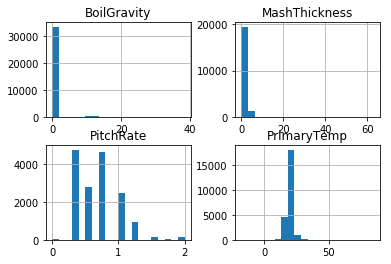

In [11]:
# histograma também mostra a distribuição dos valores.
# se os valores estiverem concentrados com alguns outliers, é conveniente trabalhar com a mediana quando preciso.
# se a distribuição foi maior, a média explica melhor a variável
dados.hist(column=['BoilGravity', 'MashThickness', 'PitchRate' , 'PrimaryTemp'], bins=20)
plt.show()

In [12]:
dados['PitchRate'].fillna(dados['PitchRate'].mean(), inplace=True)
dados.fillna(dados.median(), inplace=True)

In [13]:
y = dados['StyleID']
x = dados.drop('StyleID', axis = 1)    

In [16]:
def modelosclassificacao(a, b):
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    skfold = StratifiedKFold(n_splits=3) # Apenas 3 folds para ficar mais rápido - quanto mais divisõs, mais custoso é processamento
    x = a
    y = b
    normalizador = MinMaxScaler(feature_range = (0 , 1))
    x_norm = normalizador.fit_transform(x)
    
    logist = LogisticRegression()
    naive = GaussianNB()
    decision_tree = DecisionTreeClassifier()
    knn = KNeighborsClassifier()
    result_logist = cross_val_score(logist, x, y, cv = skfold)
    result_naive = cross_val_score(naive, x, y, cv = skfold)
    result_decision_tree = cross_val_score(decision_tree, x, y, cv = skfold)
    result_knn = cross_val_score(knn, x_norm, y, cv = skfold)
    
    dic_classmodels = {'Logística':result_logist.mean(), 'Naive':result_naive.mean(),'Decision Tree ':result_decision_tree.mean(),'KNN ':result_knn.mean()}
    melhor_modelo = max(dic_classmodels, key=dic_classmodels.get)
    print('Regressão Logística:', result_logist.mean(), 'Naive Bayes:', result_naive.mean(), 'Decision Tree:', result_decision_tree.mean(), 'KNN: ',result_knn.mean())
    print('O melhor modelo foi:', melhor_modelo, 'Com o valor:', dic_classmodels[melhor_modelo])

In [17]:
modelosclassificacao(x, y)

C:\Users\gustavo.presa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gustavo.presa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\gustavo.presa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gustavo.presa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warn

Regressão Logística: 0.4461656966091503 Naive Bayes: 0.4169442945637556 Decision Tree: 0.47213848583393686 KNN:  0.4763161506503686
O melhor modelo foi: KNN  Com o valor: 0.4763161506503686


In [18]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import GridSearchCV

# importante normalizar as distâncias porque as variáveis podem estar com grandezas diferentes
normalizador = MinMaxScaler(feature_range=(0,1))
x_norm = normalizador.fit_transform(x)

valores_K = np.array([3, 5, 7, 9, 11])
#diferentes métodos para calcular distância. Padrão é o minkowski. Também tem EuclideanDistance (euclidean), ManhattanDistance (manhattan)  e outros
calculo_distancia = ['minkowski','chebyshev']
valores_p = np.array([1, 2, 3, 4])
valores_grid = {'n_neighbors':valores_K, 'metric':calculo_distancia, 'p':valores_p}
modelo = KNeighborsClassifier() 

gridKNN = GridSearchCV(estimator = modelo, param_grid = valores_grid, cv=5)
gridKNN.fit(x_norm,y)

print("Melhor acurácia:", gridKNN.best_score_)
print("Melhor K:", gridKNN.best_estimator_.n_neighbors)
print("Método distância:", gridKNN.best_estimator_.metric)
print("Melhor valor p:", gridKNN.best_estimator_.p)

Melhor acurácia: 0.5174740289069557
Melhor K: 11
Método distância: minkowski
Melhor valor p: 1


In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
modelo = GradientBoostingClassifier(n_estimators=300)
skfold = StratifiedKFold(n_splits=3)
resultado = cross_val_score(modelo,x,y,cv = skfold, n_jobs=-1)
print(resultado.mean())

0.6106866269334966
